In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.formula.api as smf

## Q1

In [2]:
fatalities = pd.read_csv('fatalities.csv')
fatalities

,Unnamed: 0,state,year,spirits,unemp,income,emppopl,beertax,baptist,mormon,...,nfatal2124,afatal,popl,popl1517,popl1820,popl2124,milestot,unempus,emppoplus,gsp
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3.942002e+06,208999.593750,221553.437500,290000.062500,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3.960008e+06,202000.078125,219125.468750,290000.156250,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3.988992e+06,196999.968750,216724.093750,288000.156250,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4.021008e+06,194999.734375,214349.031250,284000.312500,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4.049994e+06,203999.890625,212000.000000,263000.281250,36259.0,7.0,60.700001,0.032143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.043945,66.022095,0.049451,2.630720,8.55593,...,3,62.278999,5.129998e+05,21999.941406,24821.398438,36999.839844,5127.0,7.5,59.500004,-0.016678
332,333,wy,1985,1.88,7.1,13595.338867,65.083801,0.047669,2.720570,8.54494,...,7,52.345001,5.089996e+05,22000.021484,24407.244141,35000.218750,5401.0,7.2,60.100002,-0.012126
333,334,wy,1986,1.70,9.0,13126.934570,63.966484,0.046440,2.813500,8.53397,...,11,57.856998,5.069999e+05,23000.005859,23999.998047,34999.789062,5384.0,7.0,60.700001,-0.109976
334,335,wy,1987,1.59,8.6,12719.000000,62.857143,0.045000,2.909600,8.52302,...,4,35.500000,4.900005e+05,22000.021484,22999.916016,32999.671875,5367.0,6.2,61.500000,-0.123641


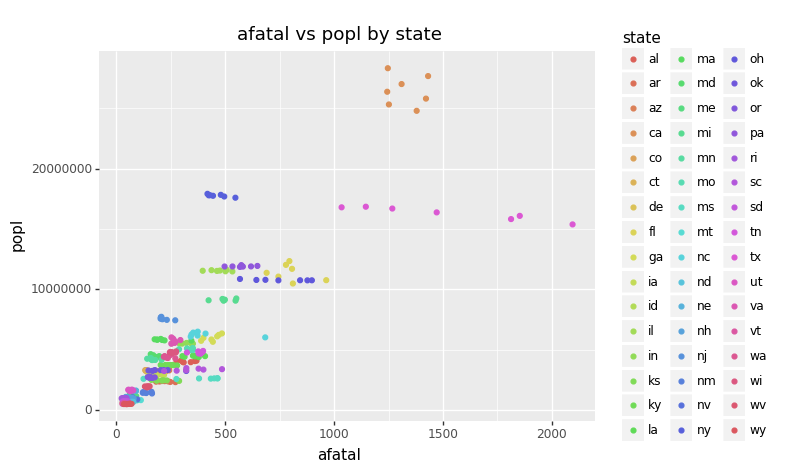

<ggplot: (7542659929)>


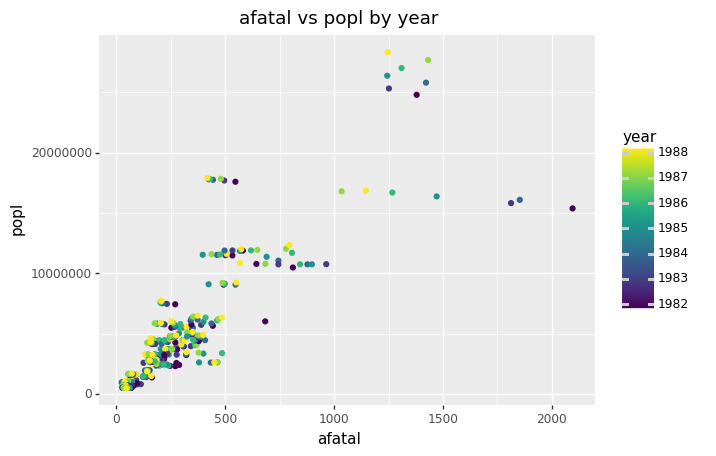

<ggplot: (7543070417)>


In [3]:
plot_1 = (ggplot(fatalities,aes(x='afatal',y='popl',color='state')) + geom_point() +
         labs(title="afatal vs popl by state"))
print(plot_1)
plot_1 = (ggplot(fatalities,aes(x='afatal',y='popl',color='year')) + geom_point() +
         labs(title="afatal vs popl by year"))
print(plot_1)

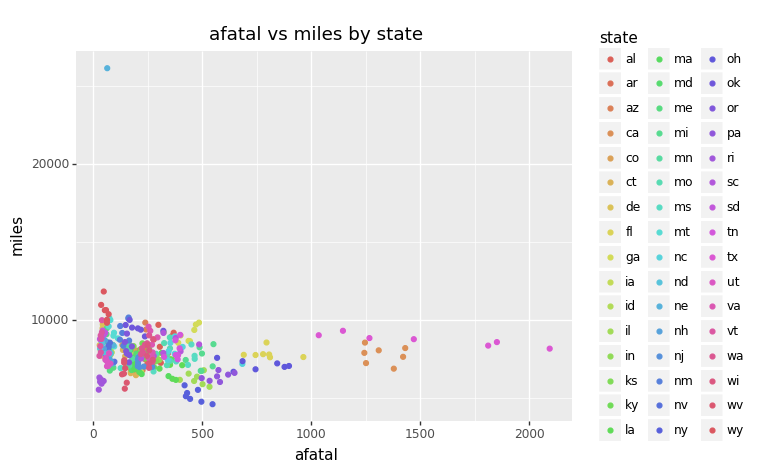

<ggplot: (7543683093)>


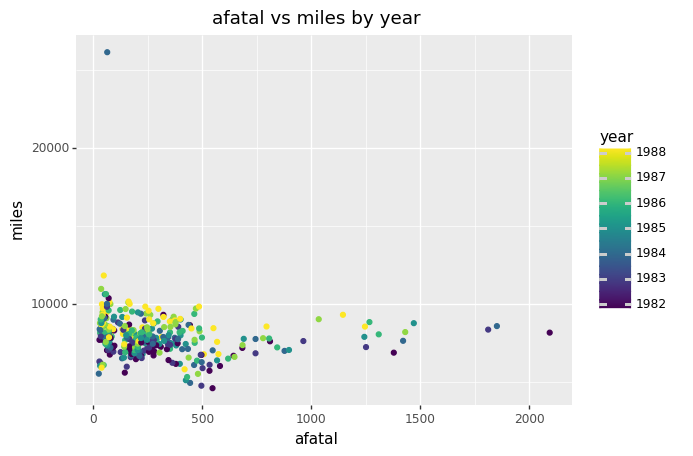

<ggplot: (7542647105)>


In [4]:
plot_2 = (ggplot(fatalities,aes(x='afatal',y='miles',color='state')) + geom_point() +
         labs(title="afatal vs miles by state"))
print(plot_2)

plot_2 = (ggplot(fatalities,aes(x='afatal',y='miles',color='year')) + geom_point() +
         labs(title="afatal vs miles by year"))
print(plot_2)

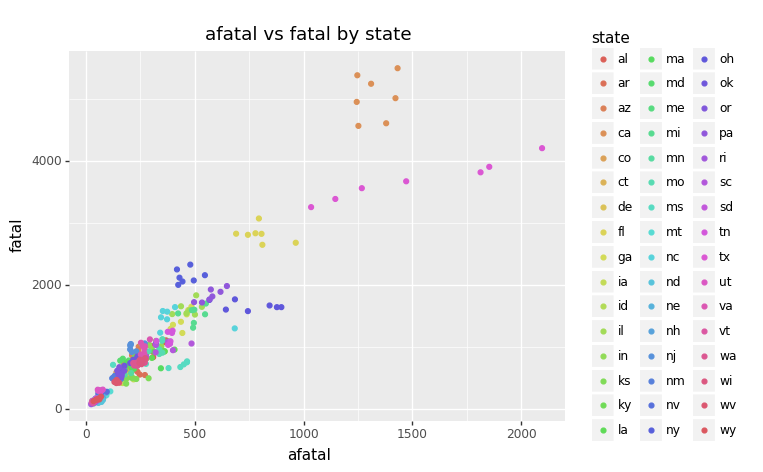

<ggplot: (7542659041)>


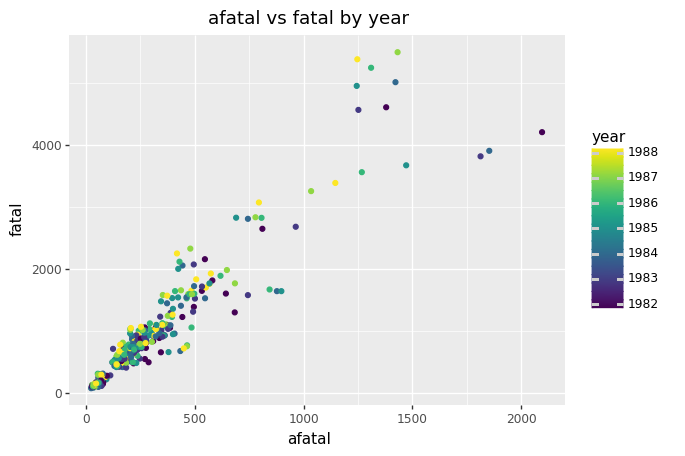

<ggplot: (7543772429)>


In [5]:
plot_3 = (ggplot(fatalities,aes(x='afatal',y='fatal',color='state')) + geom_point() +
         labs(title="afatal vs fatal by state"))
print(plot_3)

plot_3 = (ggplot(fatalities,aes(x='afatal',y='fatal',color='year')) + geom_point() +
         labs(title="afatal vs fatal by year"))
print(plot_3)

40    tx
3     ca
7     fl
32    oh
35    pa
Name: state, dtype: object
25    nd
38    sd
6     de
36    ri
43    vt
Name: state, dtype: object


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


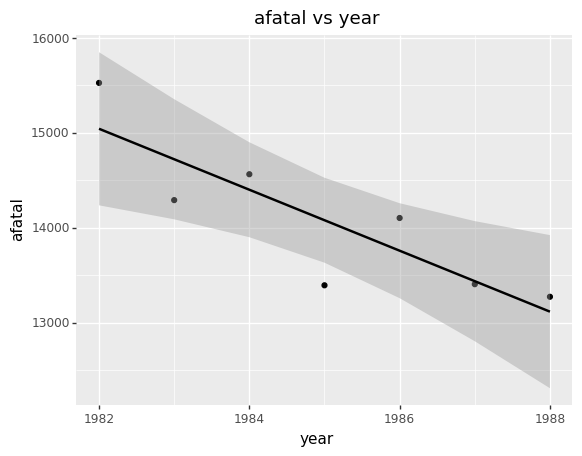

<ggplot: (7544017577)>


In [6]:
# df = fatalities.groupby('state').agg({'afatal':'sum'})

df = fatalities.groupby('state').agg({'afatal':'sum'})
df = df.reset_index()
print(df.sort_values(by=['afatal'], ascending=False).head(5)['state'])
print(df.sort_values(by=['afatal'], ascending=False).tail(5)['state'])

df = fatalities.groupby('year').agg({'afatal':'sum'})
df = df.reset_index()
plot_4 = (ggplot(df,aes(x='year',y='afatal')) + geom_point() + geom_smooth(method='lm') +
         labs(title="afatal vs year"))
print(plot_4)

I see an outlier in afatal vs miles. The top 5 states in terms of alcohol-related fatalitie are tx, ca, fl, oh and pa and bottom 5 states are nd, sd, de, ri and vt. afatal has positive relation with afatal and popl. afatal has no relation with miles. As time passes, afatal decreases.

## Q2

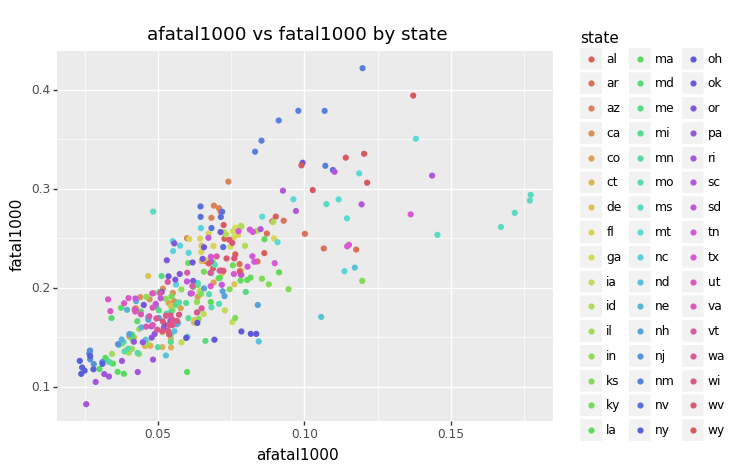

<ggplot: (7543790773)>


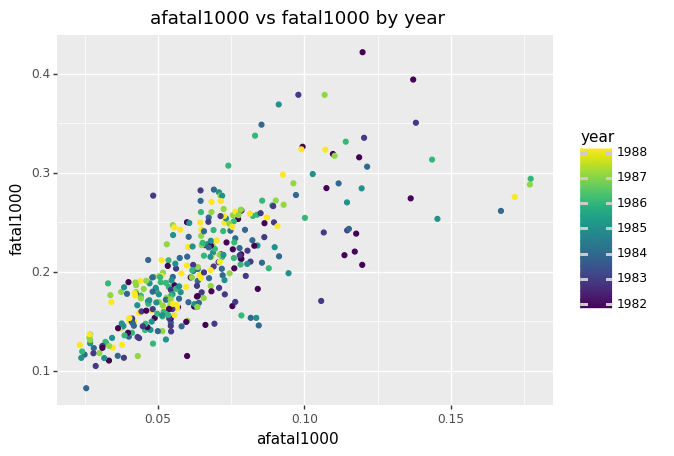

<ggplot: (7544364029)>
22    ms
47    wy
23    mt
37    sc
29    nm
Name: state, dtype: object
41    ut
16    ma
36    ri
28    nj
31    ny
Name: state, dtype: object


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


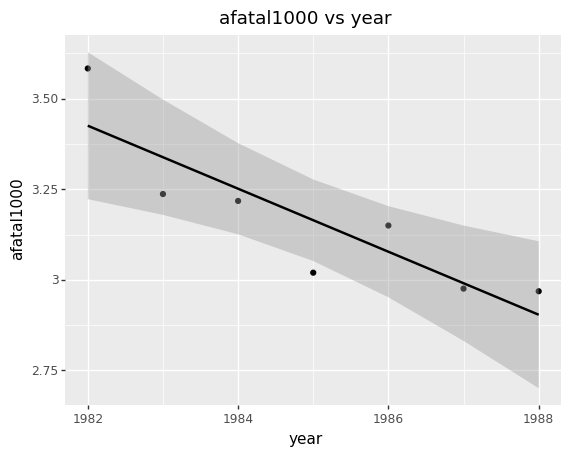

<ggplot: (7544531809)>


In [7]:
fatalities['fatal1000'] = fatalities['fatal'] * 1000 / fatalities['popl']
fatalities['afatal1000'] = fatalities['afatal'] * 1000 / fatalities['popl']

plot = (ggplot(fatalities,aes(x='afatal1000',y='fatal1000',color='state')) + geom_point() +
         labs(title="afatal1000 vs fatal1000 by state"))
print(plot)

plot = (ggplot(fatalities,aes(x='afatal1000',y='fatal1000',color='year')) + geom_point() +
         labs(title="afatal1000 vs fatal1000 by year"))
print(plot)

df = fatalities.groupby('state').agg({'afatal1000':'mean'})
df = df.reset_index()
print(df.sort_values(by=['afatal1000'], ascending=False).head(5)['state'])
print(df.sort_values(by=['afatal1000'], ascending=False).tail(5)['state'])

df = fatalities.groupby('year').agg({'afatal1000':'sum'})
df = df.reset_index()
plot = (ggplot(df,aes(x='year',y='afatal1000')) + geom_point() + geom_smooth(method='lm') +
         labs(title="afatal1000 vs year"))

print(plot)

The top 5 states in terms of afatal1000 are ms, wy, mt, sc and mn and bottom 5 states are ut, ma, ri, nj and ny. As time passes, afatal1000 decreases.

## Q3

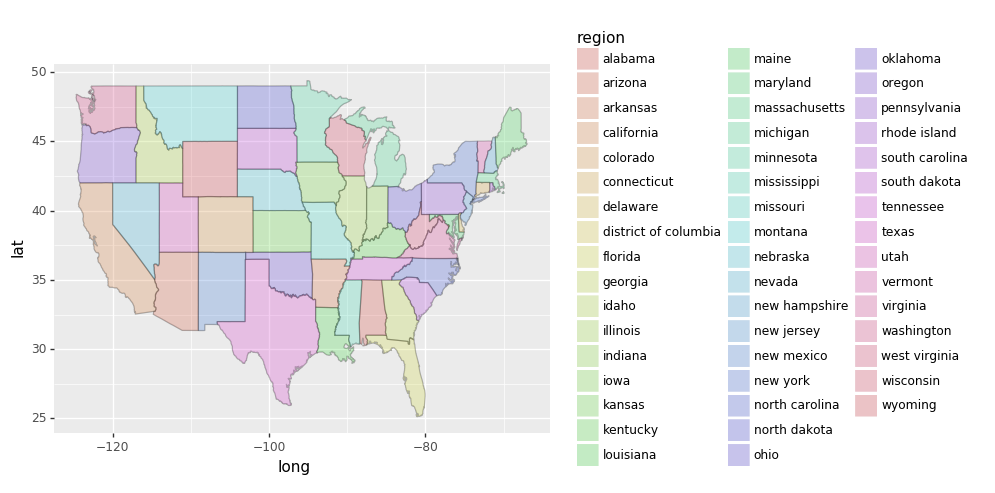

<ggplot: (7544731401)>


In [8]:
states = pd.read_csv('states.csv')
us_plt = ggplot() + geom_path(states, aes(x='long',y='lat', group='group'),alpha=0.3)
us_plt += geom_polygon(states, aes(x='long',y='lat', group='group',fill='region'),alpha=0.3)
print(us_plt)

## Q4

In [9]:


state_abbrv = pd.read_csv('state_abbrv.csv', header=None)
state_abbrv[0] = state_abbrv[0].str.lower()
state_abbrv[1] = state_abbrv[1].str.lower()
state_abbrv.columns = ['region','state']

state_abbrv = state_abbrv[state_abbrv['region'] != 'alaska']
state_abbrv = state_abbrv[state_abbrv['region'] != 'hawaii']
states = states[states['region'] != 'district of columbia']
# state_abbrv
# states
# fatalities
# state_abbrv.set_index('region').join(states.set_index('region'))
# state_abbrv.join(states.set_index('region'), on='region')
# state_abbrv.join(fatalities.set_index('state')['income'], on='state')


def merging(ip_df, col_name):
    df = state_abbrv.join(ip_df.set_index('state')[[col_name, 'year']], on='state')
    return states.join(df.set_index('region')[[col_name, 'year']], on='region')
    

    
states.groupby('region').agg({'group':'mean'})
print(states) 
print(state_abbrv)
# states.groupby('region').agg('group')
print(len(state_abbrv.index))
print(len(states.groupby('region').agg({'group':'mean'}).index))

             long        lat  group  order   region subregion
0      -87.462006  30.389681      1      1  alabama       NaN
1      -87.484932  30.372492      1      2  alabama       NaN
2      -87.525032  30.372492      1      3  alabama       NaN
3      -87.530762  30.332386      1      4  alabama       NaN
4      -87.570869  30.326654      1      5  alabama       NaN
...           ...        ...    ...    ...      ...       ...
15532 -106.856628  41.012318     63  15595  wyoming       NaN
15533 -107.309265  41.018047     63  15596  wyoming       NaN
15534 -107.922333  41.018047     63  15597  wyoming       NaN
15535 -109.056786  40.989399     63  15598  wyoming       NaN
15536 -109.051064  40.995129     63  15599  wyoming       NaN

[15527 rows x 6 columns]
            region state
0          alabama    al
2          arizona    az
3         arkansas    ar
4       california    ca
5         colorado    co
6      connecticut    ct
7         delaware    de
8          florida    fl
9    

## Q5

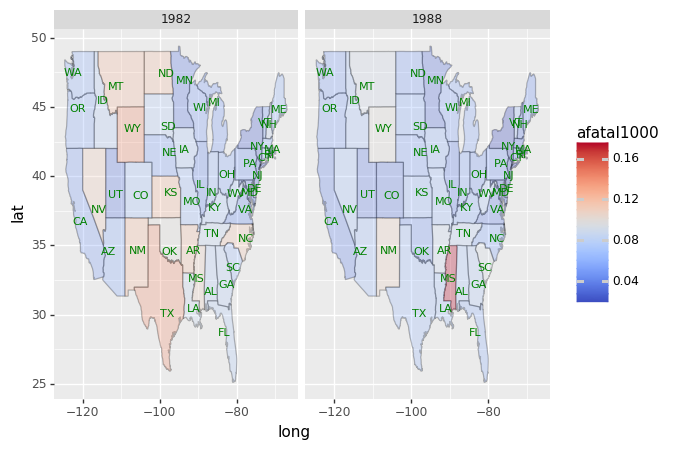

<ggplot: (7544851225)>
texas
missouri
mississippi


In [10]:

df = merging(fatalities, 'afatal1000')

df = df[(df['year'] == 1982) | (df['year'] == 1988)]
state_center = (df.groupby('region')
                .agg({'long':'mean','lat':'mean'}))
state_center = state_center.join(state_abbrv.set_index('region'))
state_center['state'] = state_center['state'].str.upper()
us_plt = (ggplot() + geom_path(df, aes(x='long',y='lat', group='group'),alpha=0.3)
            + geom_polygon(df, aes(x='long',y='lat', group='group', fill='afatal1000'),alpha=0.3)
         +scale_fill_continuous('coolwarm')
         + geom_text(state_center, aes(x='long',y='lat',label='state'), size=8, color='green')
         + facet_grid('.~year'))
print(us_plt)

# df = df.groupby('region').agg({'afatal1000':'mean'})
# print(df)

df = df.groupby(['region','year']).agg({'afatal1000':'mean'})
df = df.reset_index(col_level=1)
df = df.pivot('region','year')
df['diff'] = df['afatal1000',1982] - df['afatal1000', 1988]

# biggest drop
print(df['diff'].idxmax())
# smallest drop
print(df[df['diff'] >= 0]['diff'].idxmin())
# biggest increase
print(df['diff'].idxmin())

Texas had the biggest drop, Misssouri had the smallest drop and Mississipi had the biggest increase.

## Q6

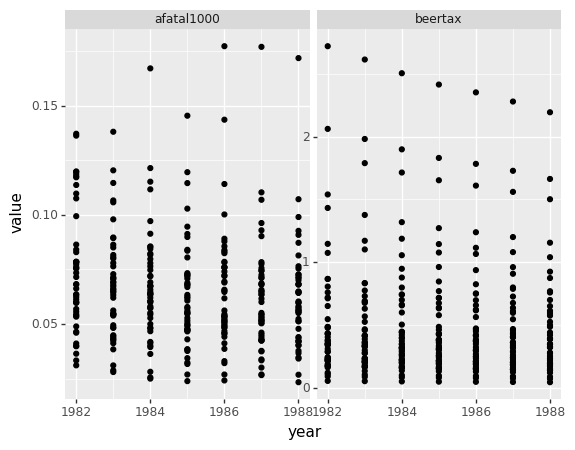

<ggplot: (7545073213)>
Intercept    0.057815
beertax      0.015810
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             afatal1000   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     30.88
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           5.61e-08
Time:                        02:10:55   Log-Likelihood:                 765.30
No. Observations:                 336   AIC:                            -1527.
Df Residuals:                     334   BIC:                            -1519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [11]:
# print(fatalities.columns)

df = fatalities[['year','afatal1000','beertax']]
df_sub = df.melt(id_vars=['year'], value_vars=['afatal1000','beertax'])

plt = (ggplot() + geom_point(df_sub, aes(x='year',y='value'))
      + facet_wrap('~ variable',scales='free_y'))
print(plt)

mod = smf.ols(formula = 'afatal1000 ~ beertax', data=fatalities)
rslt = mod.fit()

print(rslt.params)
print(rslt.summary())

The slope is 0.015810 which means as afatal increases, beertax increases. This is not surprising because increasing beer tax can help to reduce consume beer then also afatal will decreases.

## Q7

In [12]:
mod = smf.ols(formula = 'afatal1000 ~ beertax+state-1', data=fatalities) 
rslt = mod.fit()
print(len(rslt.params))
print(rslt.params)
print(rslt.summary())

#print(rslt.params.index)

49
state[al]    0.090845
state[ar]    0.099043
state[az]    0.070565
state[ca]    0.050867
state[co]    0.058179
state[ct]    0.052635
state[de]    0.064093
state[fl]    0.077719
state[ga]    0.089575
state[ia]    0.066978
state[id]    0.081727
state[il]    0.042115
state[in]    0.059349
state[ks]    0.089008
state[ky]    0.066873
state[la]    0.084654
state[ma]    0.039375
state[md]    0.041773
state[me]    0.064467
state[mi]    0.057902
state[mn]    0.042067
state[mo]    0.068479
state[ms]    0.148835
state[mt]    0.110066
state[nc]    0.074491
state[nd]    0.077023
state[ne]    0.049366
state[nh]    0.065929
state[nj]    0.029504
state[nm]    0.101284
state[nv]    0.076003
state[ny]    0.026893
state[oh]    0.072302
state[ok]    0.069943
state[or]    0.059979
state[pa]    0.049898
state[ri]    0.036541
state[sc]    0.114345
state[sd]    0.064196
state[tn]    0.081286
state[tx]    0.097313
state[ut]    0.044473
state[va]    0.051097
state[vt]    0.068322
state[wa]    0.055643
state[w

## Q8

In [13]:
mod = smf.ols(formula = 'afatal1000 ~ beertax+state+year-1', data=fatalities) 
rslt = mod.fit()
print(len(rslt.params))
print(rslt.params)
print(rslt.summary())

50
state[al]    4.262319
state[ar]    4.245570
state[az]    4.210342
state[ca]    4.185460
state[co]    4.195098
state[ct]    4.190493
state[de]    4.200108
state[fl]    4.236923
state[ga]    4.280768
state[ia]    4.208602
state[id]    4.222717
state[il]    4.178466
state[in]    4.198311
state[ks]    4.231758
state[ky]    4.203818
state[la]    4.235684
state[ma]    4.177845
state[md]    4.179261
state[me]    4.215125
state[mi]    4.201987
state[mn]    4.182064
state[mo]    4.208253
state[ms]    4.306382
state[mt]    4.250220
state[nc]    4.237772
state[nd]    4.218595
state[ne]    4.191574
state[nh]    4.213818
state[nj]    4.163709
state[nm]    4.242784
state[nv]    4.213115
state[ny]    4.162230
state[oh]    4.213873
state[ok]    4.224027
state[or]    4.197123
state[pa]    4.188368
state[ri]    4.172582
state[sc]    4.291271
state[sd]    4.212095
state[tn]    4.220876
state[tx]    4.240046
state[ut]    4.194331
state[va]    4.199801
state[vt]    4.216000
state[wa]    4.193097
state[w